In [221]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import re,json,nltk

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

from tensorflow.keras.preprocessing.text import Tokenizer



class color: # Text style

   PURPLE = '\033[95m'

   CYAN = '\033[96m'

   DARKCYAN = '\033[36m'

   BLUE = '\033[94m'

   GREEN = '\033[92m'

   YELLOW = '\033[93m'

   RED = '\033[91m'

   BOLD = '\033[1m'

   UNDERLINE = '\033[4m'

   END = '\033[0m'


In [222]:
import re

from nltk.tokenize import word_tokenize

import nltk

from nltk.tokenize import word_tokenize

import re

import string

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords



import nltk

nltk.download('all')









# Download the 'punkt' tokenizer

nltk.download('punkt')

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

In [223]:
Train = pd.read_excel('/kaggle/input/augmented-dataset/train.xlsx')
Test = pd.read_excel('/kaggle/input/augmented-dataset/test.xlsx')
Validation = pd.read_excel('/kaggle/input/augmented-dataset/dev.xlsx')



In [224]:
Validation

,Review,label
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0
2,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...,0
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1
...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1
1327,জে ছেলে মারা গেছে ওর কি হবে,0
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1


In [225]:
Train.rename(columns={'Review': 'text'}, inplace=True)
Test.rename(columns={'Review': 'text'}, inplace=True)
Validation.rename(columns={'Review': 'text'}, inplace=True)


In [226]:

# Extract the texts and labels
Train_texts = Train['text'].values
Test_texts = Test['text'].values
Validation_texts = Validation['text'].values


Train_labels = Train['label'].values
Test_labels = Test['label'].values
Validation_labels = Validation['label'].values

In [227]:
reviews_lines1=list()
Train_reviews_lines = list()
lines= Train['text'].values.tolist()

for line in lines:

  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Train_reviews_lines.append(tokens)

In [228]:
Test_reviews_lines = list()
lines= Test['text'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Test_reviews_lines.append(tokens)

In [229]:
Val_reviews_lines = list()
lines= Validation['text'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Val_reviews_lines.append(tokens)

In [230]:
len(reviews_lines1)

8746

In [231]:
len(Test_reviews_lines)

2016

In [232]:
# !pip install glove-python3

In [233]:
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical



# Initialize the label encoder

label_encoder = LabelEncoder()



# Convert string labels (e.g., 'A', 'B', etc.) to integers

train_labels = label_encoder.fit_transform(Train_labels)
test_labels = label_encoder.fit_transform(Test_labels)
val_labels = label_encoder.fit_transform(Validation_labels)



# Now convert the integer labels to one-hot encoding

y_train = to_categorical(train_labels, num_classes=3)  # Assuming 5 classes
y_test = to_categorical(test_labels, num_classes=3)  # Assuming 5 classes
y_val = to_categorical(val_labels, num_classes=3)  # Assuming 5 classes


# Check if the labels have been correctly transformed

print(f"Encoded labels: {train_labels}")

print(f"One-hot encoded labels shape: {train_labels.shape}")

Encoded labels: [0 0 0 ... 0 0 2]
One-hot encoded labels shape: (5400,)


In [234]:
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np



# Initialize the Tokenizer

tokenizer_obj = Tokenizer()

tokenizer_obj.fit_on_texts(reviews_lines1)



# Convert texts to sequences of integers

train_sequences = tokenizer_obj.texts_to_sequences(Train_reviews_lines)
test_sequences = tokenizer_obj.texts_to_sequences(Test_reviews_lines)
val_sequences = tokenizer_obj.texts_to_sequences(Val_reviews_lines)



# Define maximum length for padding

max_length = 100



word_index=tokenizer_obj.word_index



# Pad sequences to ensure uniform input size

X_train_pad = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(val_sequences, maxlen=max_length, padding='post')






print("Training content shape:", X_train_pad.shape)

print("Training language shape:", y_train.shape)


Training content shape: (5400, 100)
Training language shape: (5400, 3)


In [235]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_val_pad.shape)
print(y_val.shape)
print(X_test_pad.shape)
print(y_test.shape)

(5400, 100)
(5400, 3)
(1330, 100)
(1330, 3)
(2016, 100)
(2016, 3)


In [236]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [237]:
import gensim

# Define embedding dimension
EMBEDDING_DIM = 200

from gensim.models import Word2Vec
model = Word2Vec(reviews_lines1, vector_size=200, window=3, min_count=2, workers=4, sg=1)





In [238]:
filename = '/kaggle/working/WC.txt'
model.wv.save_word2vec_format(filename, binary=False)

# **Load the Trained Embedding Models**

In [239]:
!mkdir ROC_Curve
!mkdir Confusion_Matrix
!mkdir Auc
!mkdir loss

mkdir: cannot create directory ‘ROC_Curve’: File exists
mkdir: cannot create directory ‘Confusion_Matrix’: File exists
mkdir: cannot create directory ‘Auc’: File exists
mkdir: cannot create directory ‘loss’: File exists


In [240]:
import os

file_identifier = "WC"



Final_model_path= f"/kaggle/working/{file_identifier}.xlsx"
Roc_path =  f"/kaggle/working/ROC_Curve/{file_identifier}.pdf"
Con_path = f"/kaggle/working/Confusion_Matrix/{file_identifier}.pdf"
auc_path = f"/kaggle/working/Auc/{file_identifier}.pdf"
loss_path = f"/kaggle/working/loss/{file_identifier}.pdf"

embedding_index={}

f = open(f"/kaggle/working/WC.txt",encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [241]:
EMBEDDING_DIM=200
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [242]:
num_words

19200

In [243]:
EMBEDDING_DIM

200

In [244]:
max_length

100

In [245]:
X_train_pad[5]

array([ 500,  223,   69,  379, 1411, 4077, 1412,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [246]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10918958, -0.13744369, -0.18528032, ..., -0.06995676,
        -0.05007031, -0.14964591],
       [ 0.29604   ,  0.09701171,  0.02442085, ..., -0.10303745,
        -0.28875333, -0.18007386],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [247]:
num_classes = 3

# **CNN**

In [248]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def build_model():
    num_classes = 3         # Number of classes for classification
    filters = 128           # Number of filters in the Conv1D layer
    kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

    # Input layer
    input = Input(shape=(max_length,), dtype='int32')

    # Add embedding layer
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input)  # Apply the input tensor here

    # Convolutional and Max-Pooling layers
    conv_pools = []
    for kernel_size in kernel_sizes:
        conv = Conv1D(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu')(embedding_layer)
        pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
        conv_pools.append(pool)

    # Concatenate pooled features
    concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

    # Flatten and add fully connected layers
    flat = Flatten()(concat)
    dense = Dense(128, activation='relu')(flat)
    output = Dense(num_classes, activation='softmax')(dense)

    # Create and compile the model
    model = Model(inputs=input, outputs=output)

    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer= optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model





In [249]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_23 (Embedding)  │ (None, 100, 200)       │      3,840,000 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 98, 128)        │         76,928 │ embedding_23[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_25 (Conv1D)        │ (None, 97, 128)        │        102,528 │ embedding_23[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_26 (Conv1D)        │ (None, 96, 128)        │        128,128 │ embedding_23[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_24          │ (None, 1, 128)         │              0 │ conv1d_24[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_25          │ (None, 1, 128)         │              0 │ conv1d_25[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_26          │ (None, 1, 128)         │              0 │ conv1d_26[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 1, 384)         │              0 │ max_pooling1d_24[0][0… │
│ (Concatenate)             │                        │                │ max_pooling1d_25[0][0… │
│                           │                        │                │ max_pooling1d_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 384)            │              0 │ concatenate_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_46 (Dense)          │ (None, 128)            │         49,280 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_47 (Dense)          │ (None, 3)              │            387 │ dense_46[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,197,251 (16.01 MB)

 Trainable params: 357,251 (1.36 MB)

 Non-trainable params: 3,840,000 (14.65 MB)

In [250]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


model = build_model()
history_cnn= model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")

Epoch 1/30
169/169 - 5s - 27ms/step - accuracy: 0.5730 - loss: 0.8974 - val_accuracy: 0.6075 - val_loss: 0.8543
Epoch 2/30
169/169 - 1s - 4ms/step - accuracy: 0.6302 - loss: 0.7941 - val_accuracy: 0.6368 - val_loss: 0.7885
Epoch 3/30
169/169 - 1s - 4ms/step - accuracy: 0.6474 - loss: 0.7671 - val_accuracy: 0.6293 - val_loss: 0.7901
Epoch 4/30
169/169 - 1s - 4ms/step - accuracy: 0.6654 - loss: 0.7429 - val_accuracy: 0.6383 - val_loss: 0.7708
Epoch 5/30
169/169 - 1s - 4ms/step - accuracy: 0.6696 - loss: 0.7197 - val_accuracy: 0.6541 - val_loss: 0.7541
Epoch 6/30
169/169 - 1s - 4ms/step - accuracy: 0.6874 - loss: 0.6987 - val_accuracy: 0.6564 - val_loss: 0.7506
Epoch 7/30
169/169 - 1s - 4ms/step - accuracy: 0.6996 - loss: 0.6806 - val_accuracy: 0.6556 - val_loss: 0.7643
Epoch 8/30
169/169 - 1s - 4ms/step - accuracy: 0.7222 - loss: 0.6542 - val_accuracy: 0.6594 - val_loss: 0.7649
Epoch 9/30
169/169 - 1s - 4ms/step - accuracy: 0.7296 - loss: 0.6356 - val_accuracy: 0.6338 - val_loss: 0.7660


In [251]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6405 - loss: 0.7495
Elapsed time: 0.5862185955047607 seconds
Test Score: 0.7447478175163269
Accuracy: 0.6438491940498352


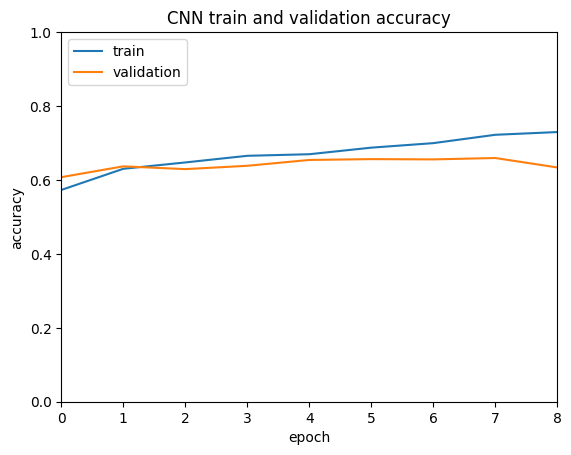

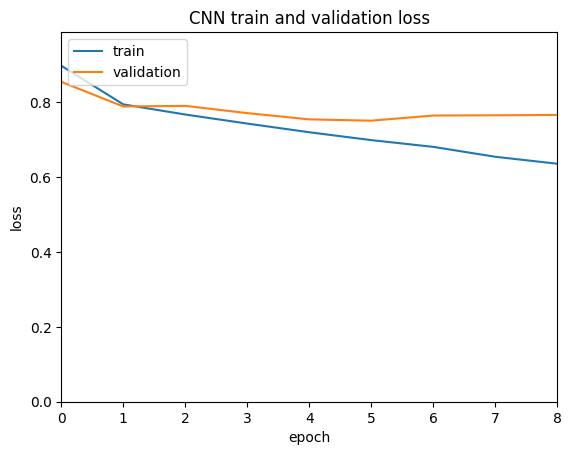

In [252]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)  # Set y-axis limits to the full range (0 to 1)
plt.xlim(0, len(history_cnn.history['accuracy']) - 1)  # Set x-axis limits to epochs
plt.show()


plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, max(max(history_cnn.history['loss']), max(history_cnn.history['val_loss'])) * 1.1)  # Adjust y-axis limits
plt.xlim(0, len(history_cnn.history['loss']) - 1)  # Set x-axis limits to epochs
plt.show()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


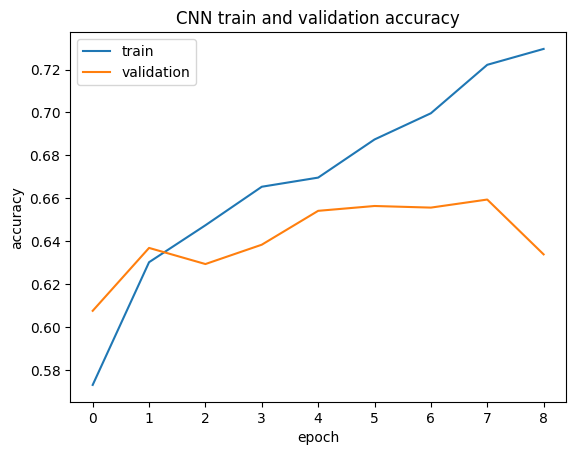

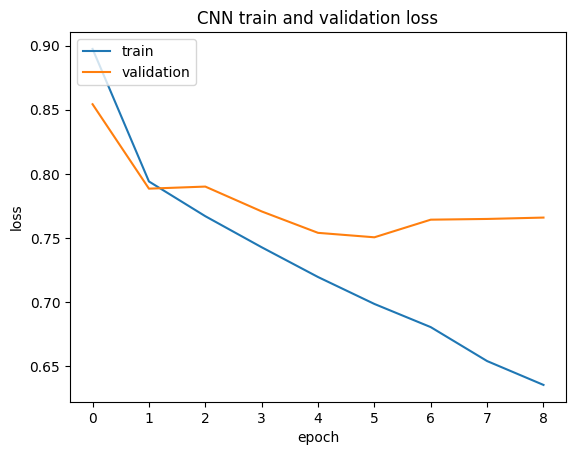

In [253]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [254]:
# integer_label = 3
# original_label = label_encoder.inverse_transform([integer_label])
# print(original_label[0])

In [255]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                  precision    recall  f1-score   support

    Non-Violence     0.6946    0.7263    0.7101      1096
Passive Violence     0.5875    0.5508    0.5686       719
 Direct Violence     0.5408    0.5274    0.5340       201

        accuracy                         0.6438      2016
       macro avg     0.6076    0.6015    0.6042      2016
    weighted avg     0.6411    0.6438    0.6421      2016



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


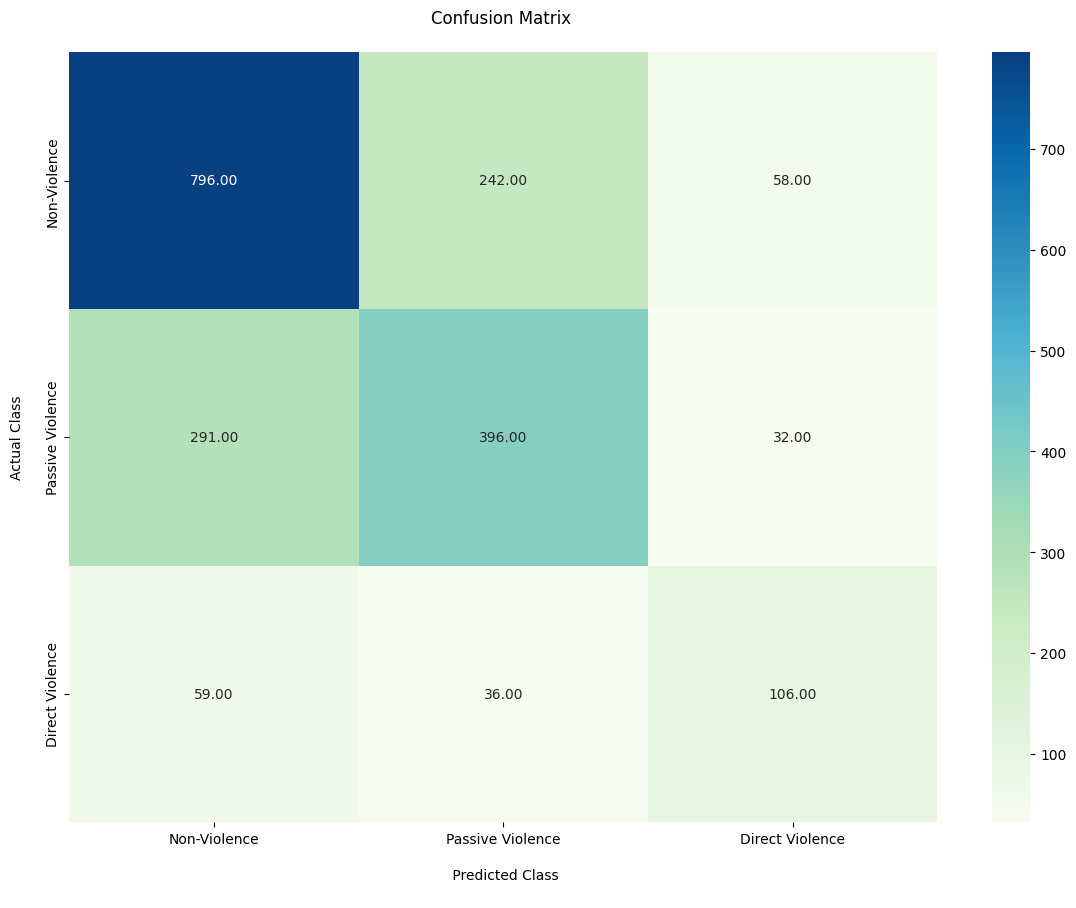

In [256]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Class\n')
fx.set_ylabel('Actual Class\n');
fx.xaxis.set_ticklabels(['Non-Violence', 'Passive Violence', 'Direct Violence'])
fx.yaxis.set_ticklabels(['Non-Violence', 'Passive Violence', 'Direct Violence'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


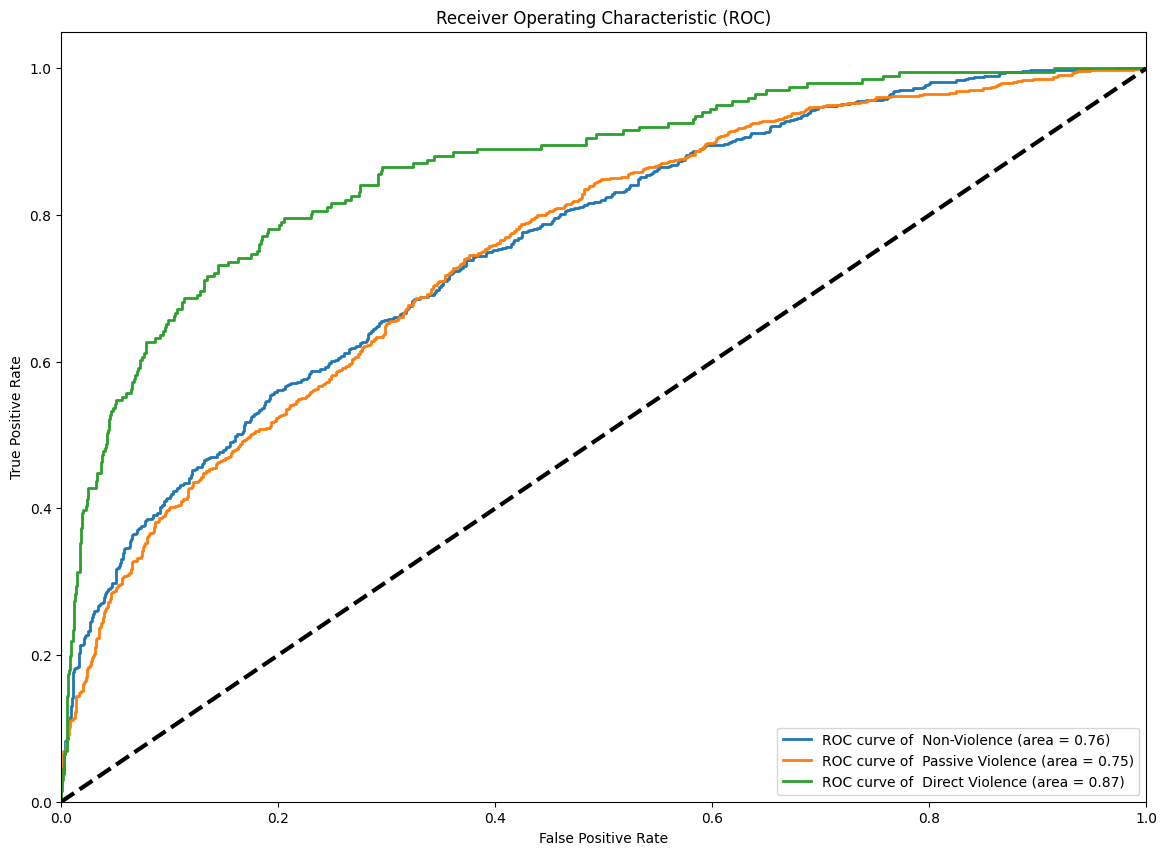

In [257]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [258]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_df = CNN_df.set_index('Metric').T

CNN_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN,0.643849,0.607648,0.601469,0.604214,0.744748,9.569724,0.586219


> LSTM

In [259]:
embedding_dim = EMBEDDING_DIM

In [260]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

def build_lstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # LSTM layer
    lstm = LSTM(128, return_sequences=False)(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [261]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_lstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 16ms/step - accuracy: 0.5143 - loss: 1.0285 - val_accuracy: 0.5391 - val_loss: 0.9795
Epoch 2/30
169/169 - 1s - 7ms/step - accuracy: 0.5119 - loss: 0.9667 - val_accuracy: 0.5391 - val_loss: 0.9175
Epoch 3/30
169/169 - 1s - 7ms/step - accuracy: 0.5169 - loss: 0.9323 - val_accuracy: 0.5511 - val_loss: 0.9199
Epoch 4/30
169/169 - 1s - 7ms/step - accuracy: 0.5352 - loss: 0.9236 - val_accuracy: 0.5511 - val_loss: 0.9009
Epoch 5/30
169/169 - 1s - 7ms/step - accuracy: 0.5343 - loss: 0.9181 - val_accuracy: 0.5556 - val_loss: 0.9076
Epoch 6/30
169/169 - 1s - 7ms/step - accuracy: 0.5359 - loss: 0.9073 - val_accuracy: 0.5489 - val_loss: 0.8934
Epoch 7/30
169/169 - 1s - 7ms/step - accuracy: 0.5380 - loss: 0.9014 - val_accuracy: 0.5541 - val_loss: 0.8656
Epoch 8/30
169/169 - 1s - 7ms/step - accuracy: 0.5424 - loss: 0.8852 - val_accuracy: 0.5669 - val_loss: 0.8845
Epoch 9/30
169/169 - 1s - 7ms/step - accuracy: 0.5419 - loss: 0.8791 - val_accuracy: 0.5519 - val_loss: 0.8603
Epoch 10/30

In [262]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5770 - loss: 0.8149
Elapsed time: 0.12880611419677734 seconds
Test Score: 0.7846909761428833
Accuracy: 0.601190447807312


In [263]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

    Non-Violence     0.6604    0.7080    0.6834      1096
Passive Violence     0.5185    0.4673    0.4916       719
 Direct Violence     0.5181    0.4975    0.5076       201

        accuracy                         0.6012      2016
       macro avg     0.5657    0.5576    0.5609      2016
    weighted avg     0.5956    0.6012    0.5975      2016



In [264]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'LSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



LSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
LSTM_df = LSTM_df.set_index('Metric').T

LSTM_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
LSTM,0.60119,0.565693,0.557619,0.560867,0.784691,29.54178,0.128806


**BiLSTM**>

In [265]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bilstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional LSTM layer
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bilstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [266]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bilstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.5256 - loss: 0.9807 - val_accuracy: 0.5947 - val_loss: 0.9209
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5754 - loss: 0.8913 - val_accuracy: 0.6316 - val_loss: 0.8397
Epoch 3/30
169/169 - 2s - 10ms/step - accuracy: 0.6085 - loss: 0.8448 - val_accuracy: 0.6120 - val_loss: 0.8117
Epoch 4/30
169/169 - 2s - 10ms/step - accuracy: 0.6178 - loss: 0.8193 - val_accuracy: 0.6248 - val_loss: 0.7979
Epoch 5/30
169/169 - 2s - 10ms/step - accuracy: 0.6241 - loss: 0.8063 - val_accuracy: 0.6180 - val_loss: 0.7938
Epoch 6/30
169/169 - 2s - 10ms/step - accuracy: 0.6339 - loss: 0.7931 - val_accuracy: 0.6338 - val_loss: 0.7749
Epoch 7/30
169/169 - 2s - 10ms/step - accuracy: 0.6287 - loss: 0.7977 - val_accuracy: 0.6286 - val_loss: 0.7919
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.6385 - loss: 0.7851 - val_accuracy: 0.6459 - val_loss: 0.7724
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.6469 - loss: 0.7797 - val_accuracy: 0.6481 - val_loss: 0.7766
Epo

In [267]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiLSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiLSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiLSTM_df = BiLSTM_df.set_index('Metric').T


BiLSTM_df




Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiLSTM,0.650794,0.616439,0.563089,0.568017,0.788721,38.001489,0.166263


**BiGRU**

In [268]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bigru_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional GRU layer
    bigru = Bidirectional(GRU(128, return_sequences=False))(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bigru)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [269]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bigru_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.5069 - loss: 0.9940 - val_accuracy: 0.5556 - val_loss: 0.9387
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5596 - loss: 0.9312 - val_accuracy: 0.6023 - val_loss: 0.8741
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.5869 - loss: 0.8735 - val_accuracy: 0.6211 - val_loss: 0.8305
Epoch 4/30
169/169 - 2s - 11ms/step - accuracy: 0.6161 - loss: 0.8375 - val_accuracy: 0.6248 - val_loss: 0.8182
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.6198 - loss: 0.8266 - val_accuracy: 0.6323 - val_loss: 0.7978
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.6280 - loss: 0.8131 - val_accuracy: 0.6361 - val_loss: 0.8001
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.6257 - loss: 0.8122 - val_accuracy: 0.6436 - val_loss: 0.7871
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.6306 - loss: 0.8077 - val_accuracy: 0.6444 - val_loss: 0.7969
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.6313 - loss: 0.8035 - val_accuracy: 0.6459 - val_loss: 0.7789
Epo

In [270]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiGRU'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiGRU_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiGRU_df = BiGRU_df.set_index('Metric').T

BiGRU_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiGRU,0.650298,0.595604,0.549891,0.56364,0.738969,23.874632,0.155391


In [271]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_lstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # LSTM layer for sequence modeling
    lstm = LSTM(128, return_sequences=False)(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [272]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_lstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 17ms/step - accuracy: 0.5131 - loss: 1.0191 - val_accuracy: 0.5398 - val_loss: 0.9466
Epoch 2/30
169/169 - 1s - 6ms/step - accuracy: 0.5285 - loss: 0.9404 - val_accuracy: 0.5609 - val_loss: 0.9055
Epoch 3/30
169/169 - 1s - 6ms/step - accuracy: 0.5367 - loss: 0.9158 - val_accuracy: 0.5662 - val_loss: 0.8959
Epoch 4/30
169/169 - 1s - 6ms/step - accuracy: 0.5372 - loss: 0.8989 - val_accuracy: 0.5647 - val_loss: 0.8819
Epoch 5/30
169/169 - 1s - 6ms/step - accuracy: 0.5485 - loss: 0.8833 - val_accuracy: 0.5722 - val_loss: 0.8765
Epoch 6/30
169/169 - 1s - 6ms/step - accuracy: 0.5539 - loss: 0.8673 - val_accuracy: 0.5541 - val_loss: 0.8610
Epoch 7/30
169/169 - 1s - 6ms/step - accuracy: 0.5581 - loss: 0.8621 - val_accuracy: 0.5504 - val_loss: 0.8617
Epoch 8/30
169/169 - 1s - 6ms/step - accuracy: 0.5641 - loss: 0.8484 - val_accuracy: 0.5526 - val_loss: 0.8942
Epoch 9/30
169/169 - 1s - 6ms/step - accuracy: 0.5624 - loss: 0.8441 - val_accuracy: 0.5714 - val_loss: 0.8465
Epoch 10/30

In [273]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_LSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_LSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_LSTM_df = CNN_LSTM_df.set_index('Metric').T

CNN_LSTM_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_LSTM,0.544643,0.520143,0.599985,0.516683,0.860215,19.499856,0.105437


In [274]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_bilstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Bidirectional LSTM layer for sequence modeling
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bilstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [275]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_bilstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.4959 - loss: 1.0113 - val_accuracy: 0.5474 - val_loss: 0.9516
Epoch 2/30
169/169 - 1s - 8ms/step - accuracy: 0.5550 - loss: 0.9079 - val_accuracy: 0.6030 - val_loss: 0.8382
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.5935 - loss: 0.8548 - val_accuracy: 0.5842 - val_loss: 0.8403
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.6141 - loss: 0.8286 - val_accuracy: 0.6248 - val_loss: 0.7973
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.6256 - loss: 0.8082 - val_accuracy: 0.6241 - val_loss: 0.7971
Epoch 6/30
169/169 - 1s - 8ms/step - accuracy: 0.6344 - loss: 0.8002 - val_accuracy: 0.6301 - val_loss: 0.7908
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.6402 - loss: 0.7922 - val_accuracy: 0.6391 - val_loss: 0.7916
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.6357 - loss: 0.7844 - val_accuracy: 0.6398 - val_loss: 0.7749
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.6374 - loss: 0.7748 - val_accuracy: 0.6211 - val_loss: 0.7787
Epoch 10/30

In [276]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_BiLSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_BiLSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_BiLSTM_df = CNN_BiLSTM_df.set_index('Metric').T


CNN_BiLSTM_df





Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_BiLSTM,0.667659,0.614801,0.59551,0.600724,0.745192,36.772147,0.127004


In [277]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, GRU, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_bigru_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Bidirectional GRU layer for sequence modeling
    bigru = Bidirectional(GRU(128, return_sequences=False))(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bigru)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [278]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_bigru_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 22ms/step - accuracy: 0.5111 - loss: 0.9897 - val_accuracy: 0.5647 - val_loss: 0.9217
Epoch 2/30
169/169 - 1s - 8ms/step - accuracy: 0.5739 - loss: 0.9033 - val_accuracy: 0.6120 - val_loss: 0.8698
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.6013 - loss: 0.8544 - val_accuracy: 0.6278 - val_loss: 0.8196
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.6165 - loss: 0.8332 - val_accuracy: 0.6211 - val_loss: 0.8267
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.6298 - loss: 0.8153 - val_accuracy: 0.6308 - val_loss: 0.8027
Epoch 6/30
169/169 - 1s - 8ms/step - accuracy: 0.6376 - loss: 0.8014 - val_accuracy: 0.6466 - val_loss: 0.7874
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.6472 - loss: 0.7971 - val_accuracy: 0.6451 - val_loss: 0.7941
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.6452 - loss: 0.7850 - val_accuracy: 0.6504 - val_loss: 0.7727
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.6498 - loss: 0.7754 - val_accuracy: 0.6444 - val_loss: 0.7727
Epoch 10/30

In [279]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_BiGRU'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_BiGRU_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_BiGRU_df = CNN_BiGRU_df.set_index('Metric').T

CNN_BiGRU_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_BiGRU,0.668155,0.629929,0.59502,0.608039,0.719413,31.297319,0.124915


In [280]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam


def build_lstm_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # LSTM layer for sequence modeling (returning only the final state)
    lstm = LSTM(128, return_sequences=False)(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the sequence to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the LSTM and CNN outputs
    combined = tf.keras.layers.concatenate([lstm, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [281]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_lstm_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 18ms/step - accuracy: 0.5059 - loss: 0.9923 - val_accuracy: 0.5504 - val_loss: 0.9427
Epoch 2/30
169/169 - 1s - 8ms/step - accuracy: 0.5456 - loss: 0.9259 - val_accuracy: 0.6008 - val_loss: 0.8752
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.5885 - loss: 0.8614 - val_accuracy: 0.6263 - val_loss: 0.8113
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.6189 - loss: 0.8221 - val_accuracy: 0.6278 - val_loss: 0.8153
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.6246 - loss: 0.8066 - val_accuracy: 0.6338 - val_loss: 0.7855
Epoch 6/30
169/169 - 1s - 8ms/step - accuracy: 0.6337 - loss: 0.7948 - val_accuracy: 0.6466 - val_loss: 0.7799
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.6346 - loss: 0.7915 - val_accuracy: 0.6218 - val_loss: 0.7799
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.6407 - loss: 0.7813 - val_accuracy: 0.6504 - val_loss: 0.7723
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.6446 - loss: 0.7745 - val_accuracy: 0.6511 - val_loss: 0.7665
Epoch 10/30

In [282]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'LSTM_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



LSTM_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
LSTM_CNN_df = LSTM_CNN_df.set_index('Metric').T


LSTM_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
LSTM_CNN,0.662202,0.654179,0.572801,0.596035,0.729373,27.719812,0.130071


In [283]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bilstm_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional LSTM layer
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the CNN output to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the BiLSTM and CNN outputs
    combined = tf.keras.layers.concatenate([bilstm, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [284]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bilstm_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 27ms/step - accuracy: 0.5359 - loss: 0.9577 - val_accuracy: 0.6060 - val_loss: 0.8793
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5950 - loss: 0.8669 - val_accuracy: 0.6293 - val_loss: 0.8178
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.6148 - loss: 0.8248 - val_accuracy: 0.6308 - val_loss: 0.7927
Epoch 4/30
169/169 - 2s - 11ms/step - accuracy: 0.6276 - loss: 0.8033 - val_accuracy: 0.6278 - val_loss: 0.7920
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.6346 - loss: 0.7917 - val_accuracy: 0.6391 - val_loss: 0.7732
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.6394 - loss: 0.7823 - val_accuracy: 0.6436 - val_loss: 0.7570
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.6485 - loss: 0.7701 - val_accuracy: 0.6481 - val_loss: 0.7524
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.6472 - loss: 0.7626 - val_accuracy: 0.6541 - val_loss: 0.7527
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.6533 - loss: 0.7574 - val_accuracy: 0.6481 - val_loss: 0.7558
Epo

In [285]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiLSTM_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiLSTM_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiLSTM_CNN_df = BiLSTM_CNN_df.set_index('Metric').T


BiLSTM_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiLSTM_CNN,0.658234,0.637707,0.553479,0.575474,0.720686,21.790838,0.174602


In [286]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam


def build_bigru_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional GRU layer
    bigru = Bidirectional(GRU(128, return_sequences=False))(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the CNN output to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the BiGRU and CNN outputs
    combined = tf.keras.layers.concatenate([bigru, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [287]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bigru_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 6s - 33ms/step - accuracy: 0.5133 - loss: 0.9837 - val_accuracy: 0.5767 - val_loss: 0.9165
Epoch 2/30
169/169 - 2s - 12ms/step - accuracy: 0.5824 - loss: 0.9032 - val_accuracy: 0.6233 - val_loss: 0.8486
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.6120 - loss: 0.8432 - val_accuracy: 0.6421 - val_loss: 0.8097
Epoch 4/30
169/169 - 2s - 12ms/step - accuracy: 0.6183 - loss: 0.8214 - val_accuracy: 0.6391 - val_loss: 0.7953
Epoch 5/30
169/169 - 2s - 12ms/step - accuracy: 0.6294 - loss: 0.8033 - val_accuracy: 0.6459 - val_loss: 0.7870
Epoch 6/30
169/169 - 2s - 12ms/step - accuracy: 0.6291 - loss: 0.7931 - val_accuracy: 0.6459 - val_loss: 0.7823
Epoch 7/30
169/169 - 2s - 12ms/step - accuracy: 0.6319 - loss: 0.7884 - val_accuracy: 0.6451 - val_loss: 0.7755
Epoch 8/30
169/169 - 2s - 12ms/step - accuracy: 0.6393 - loss: 0.7801 - val_accuracy: 0.6429 - val_loss: 0.7716
Epoch 9/30
169/169 - 2s - 12ms/step - accuracy: 0.6511 - loss: 0.7670 - val_accuracy: 0.6489 - val_loss: 0.7648
Epo

In [288]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiGRU_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiGRU_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiGRU_CNN_df = BiGRU_CNN_df.set_index('Metric').T


BiGRU_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiGRU_CNN,0.649802,0.618212,0.5695,0.58477,0.725346,52.870353,0.163926


In [289]:
import pandas as pd

# Concatenate all DataFrames vertically (row-wise)
final_df = pd.concat([
    CNN_df,
    LSTM_df,
    BiLSTM_df,
    BiGRU_df,
    CNN_LSTM_df,
    CNN_BiLSTM_df,
    CNN_BiGRU_df,
    LSTM_CNN_df,
    BiLSTM_CNN_df,
    BiGRU_CNN_df
], ignore_index=False)  # use ignore_index=True to reset row index

final_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN,0.643849,0.607648,0.601469,0.604214,0.744748,9.569724,0.586219
LSTM,0.601190,0.565693,0.557619,0.560867,0.784691,29.541780,0.128806
BiLSTM,0.650794,0.616439,0.563089,0.568017,0.788721,38.001489,0.166263
BiGRU,0.650298,0.595604,0.549891,0.563640,0.738969,23.874632,0.155391
CNN_LSTM,0.544643,0.520143,0.599985,0.516683,0.860215,19.499856,0.105437
CNN_BiLSTM,0.667659,0.614801,0.595510,0.600724,0.745192,36.772147,0.127004
CNN_BiGRU,0.668155,0.629929,0.595020,0.608039,0.719413,31.297319,0.124915
LSTM_CNN,0.662202,0.654179,0.572801,0.596035,0.729373,27.719812,0.130071
BiLSTM_CNN,0.658234,0.637707,0.553479,0.575474,0.720686,21.790838,0.174602
BiGRU_CNN,0.649802,0.618212,0.569500,0.584770,0.725346,52.870353,0.163926
